## Introduction

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.


## Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 
The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. A typical lead conversion process can be represented using the following funnel:

Lead Conversion Process - Demonstrated as a funnel
Lead Conversion Process - Demonstrated as a funnel
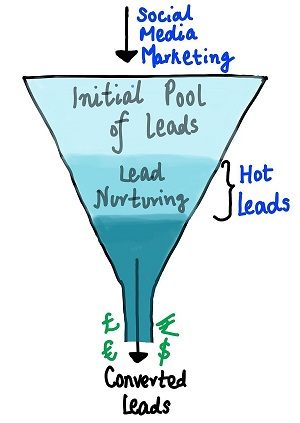
As you can see, there are a lot of leads generated in the initial stage (top) but only a few of them come out as paying customers from the bottom. In the middle stage, you need to nurture the potential leads well (i.e. educating the leads about the product, constantly communicating etc. ) in order to get a higher lead conversion.

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

## Business Objective:

1. To build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads

2. Model to be adjusted to the company's requirement changes in the future


 # <span style='color:Green'>TABLE OF CONTENT</span>

## 1.0 Importing Libraries
## 2.0 Reading Dataset and Understanding Data
## 3.0 Cleaning Data
### 3.1 Dropping columns that are not useful for analysis
### 3.2 Handling Missing values
## 4.0 Data Preparation for modelling
### 4.1 EDA of numeric variables
### 4.2 Dummy variable creation for categorical variables
### 4.3 Test-Train Split
### 4.4 Scaling Features
### 4.5 Looking at the correlations
## 5.0 Model Building
## 6.0 Model Evaluation
### 6.1 Creating a dataframe with the actual conversion flag and the predicted probabilities
### 6.2 Finding the Optimal Cutoff
### 6.3 Making Predictions on the Test Set
### 6.4 Precision-Recall View
### 6.5 Making Predictions on the Test Set
## 7.0 Summary


## 1.0 Importing Libraries

In [13]:
##imporitng the required packages
import numpy as np
import pandas as pd
import time, warnings
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
pd.options.display.max_columns = None

## 2.0 Reading Dataset and Understanding Data

In [14]:
#Read the csv file using pandas
LeadScoring_df = pd.read_csv('Leads.csv')

In [15]:
LeadScoring_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [16]:
LeadScoring_df.shape

(9240, 37)

In [17]:
LeadScoring_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [18]:
LeadScoring_df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [19]:
LeadScoring_df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [20]:
LeadScoring_df.size

341880

In [21]:
LeadScoring_df.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [26]:
LeadScoring_df.axes

[RangeIndex(start=0, stop=9240, step=1),
 Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
        'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
        'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
        'Country', 'Specialization', 'How did you hear about X Education',
        'What is your current occupation',
        'What matters most to you in choosing a course', 'Search', 'Magazine',
        'Newspaper Article', 'X Education Forums', 'Newspaper',
        'Digital Advertisement', 'Through Recommendations',
        'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
        'Update me on Supply Chain Content', 'Get updates on DM Content',
        'Lead Profile', 'City', 'Asymmetrique Activity Index',
        'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
        'Asymmetrique Profile Score',
        'I agree to pay the amount through cheque',
        'A free copy of Mastering The Interview', 'La

In [27]:
# Check the summary of the dataset

LeadScoring_df.describe(include='all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [28]:
LeadScoring_df.values

array([['7927b2df-8bba-4d29-b9a2-b6e0beafe620', 660737, 'API', ..., 'No',
        'No', 'Modified'],
       ['2a272436-5132-4136-86fa-dcc88c88f482', 660728, 'API', ..., 'No',
        'No', 'Email Opened'],
       ['8cc8c611-a219-4f35-ad23-fdfd2656bd8a', 660727,
        'Landing Page Submission', ..., 'No', 'Yes', 'Email Opened'],
       ...,
       ['aac550fe-a586-452d-8d3c-f1b62c94e02c', 579545,
        'Landing Page Submission', ..., 'No', 'Yes', 'SMS Sent'],
       ['5330a7d1-2f2b-4df4-85d6-64ca2f6b95b9', 579538,
        'Landing Page Submission', ..., 'No', 'No', 'SMS Sent'],
       ['571b5c8e-a5b2-4d57-8574-f2ffb06fdeff', 579533,
        'Landing Page Submission', ..., 'No', 'Yes', 'Modified']],
      dtype=object)

## 3.0 Cleaning Data

### 3.1 Drop columns that are not useful for analysis

In [29]:
# Check the number of missing values in each column

LeadScoring_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [30]:
# Drop all the columns in which greater than 3000 missing values are present

for col in LeadScoring_df.columns:
    if LeadScoring_df[col].isnull().sum() > 3000:
        LeadScoring_df.drop(col, 1, inplace=True)

In [31]:
# Check the number of null values again

LeadScoring_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [32]:
## As you might be able to interpret, the variable City won't be of any use in our analysis. So it's best that we drop it.

LeadScoring_df.drop(['City'], axis = 1, inplace = True)

In [33]:
# Same goes for the variable 'Country'

LeadScoring_df.drop(['Country'], axis = 1, inplace = True)

In [34]:
# Let's now check the percentage of missing values in each column

round(100*(LeadScoring_df.isnull().sum()/len(LeadScoring_df.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [35]:
# Check the number of null values again

LeadScoring_df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

Now recall that there are a few columns in which there is a level called 'Select' which basically means that the student had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we need to identify the value counts of the level 'Select' in all the columns that it is present.


In [36]:
# Get the value counts of all the columns

for column in LeadScoring_df:
    print(LeadScoring_df[column].astype('category').value_counts())
    print('___________________________________________________')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
___________________________________________________
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
__________________

The following three columns now have the level 'Select'. Let's check them once again.

## 3.2 Handle Missing values

In [37]:
LeadScoring_df['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [38]:
LeadScoring_df['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [39]:
LeadScoring_df['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

Clearly the levels Lead Profile and How did you hear about X Education have a lot of rows which have the value Select which is of no use to the analysis so it's best that we drop them.



In [40]:
LeadScoring_df.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

In [41]:
LeadScoring_df.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

Also, the variable `What matters most to you in choosing a course` has the level `Better Career Prospects` `6528` times while the other two levels appear once twice and once respectively. So we should drop this column as well.

In [42]:
LeadScoring_df['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [43]:
# Drop the null value rows present in the variable 'What matters most to you in choosing a course'

LeadScoring_df.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)


In [44]:
# Check the number of null values again

LeadScoring_df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Since now the number of null values present in the columns are quite small we can simply drop the rows in which these null values are present.

In [45]:
# Drop the null value rows in the column 'TotalVisits'

LeadScoring_df = LeadScoring_df[~pd.isnull(LeadScoring_df['TotalVisits'])]

In [46]:
# Check the null values again

LeadScoring_df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 29
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1431
What is your current occupation           2683
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [47]:
# Drop the null values rows in the column 'Lead Source'

LeadScoring_df = LeadScoring_df[~pd.isnull(LeadScoring_df['Lead Source'])]

In [48]:
# Check the number of null values again

LeadScoring_df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                            1431
What is your current occupation           2683
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [49]:
# Drop the null values rows in the column 'Specialization'

LeadScoring_df = LeadScoring_df[~pd.isnull(LeadScoring_df['Specialization'])]

In [50]:
# Check the number of null values again

LeadScoring_df.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                               0
What is your current occupation           1270
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

Now your data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [51]:
print(len(LeadScoring_df.index))
print(len(LeadScoring_df.index)/9240) 

7643
0.8271645021645022


In [52]:
# Let's look at the dataset again

LeadScoring_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


Now, clearly the variables `Prospect ID` and `Lead Number` won't be of any use in the analysis, so it's best that we drop these two variables.

In [53]:
LeadScoring_df.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [54]:
LeadScoring_df.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


## 4.0 Data Preparation for modelling

### 4.1 EDA of Numeric Variables

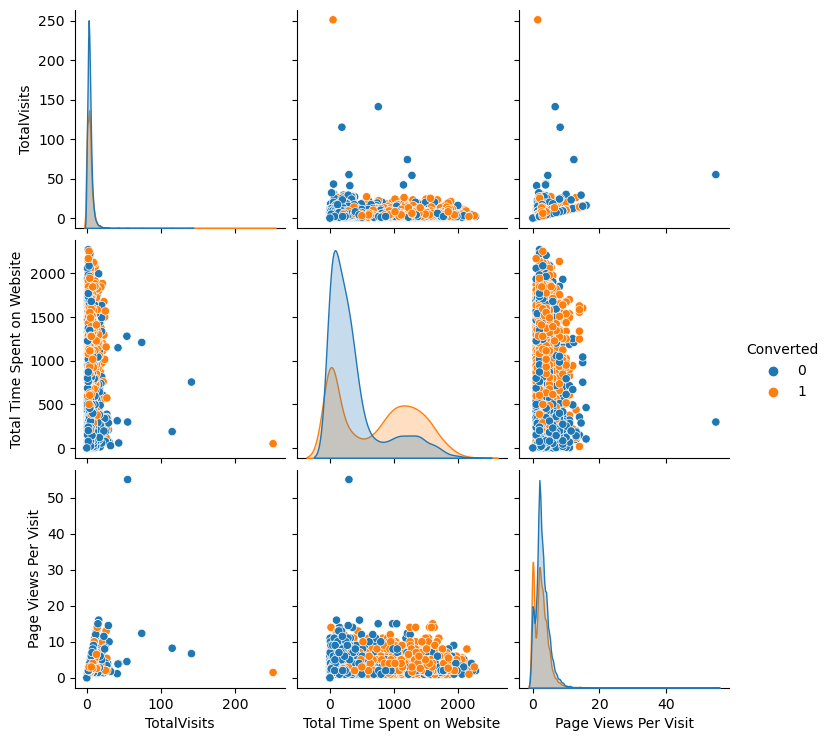

In [55]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(LeadScoring_df,diag_kind='kde',hue='Converted')
plt.show()

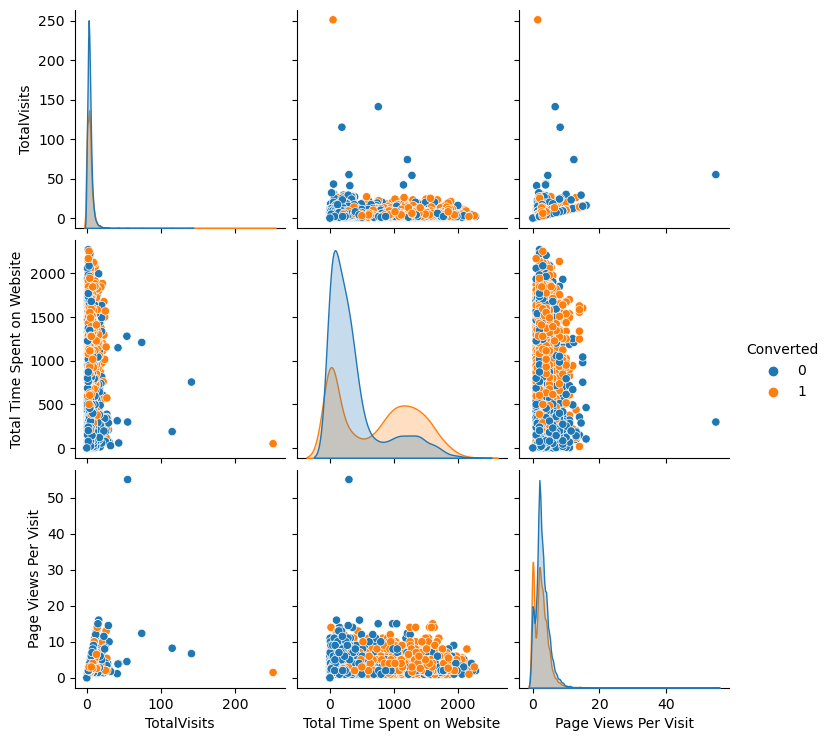

In [57]:
Edu_Lead = LeadScoring_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(Edu_Lead,diag_kind='kde',hue='Converted')
plt.show()

In [58]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
transformedEdu_Lead = pd.DataFrame(pt.fit_transform(Edu_Lead))
transformedEdu_Lead.columns = Edu_Lead.columns
transformedEdu_Lead.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Converted
0,-1.655186,-1.615423,-1.642760,-0.867977
1,0.630019,0.624129,0.139652,-0.867977
2,-0.315302,1.308534,-0.118143,1.152104
3,-0.831403,0.096284,-0.741075,-0.867977
4,-0.315302,1.243633,-0.741075,1.152104


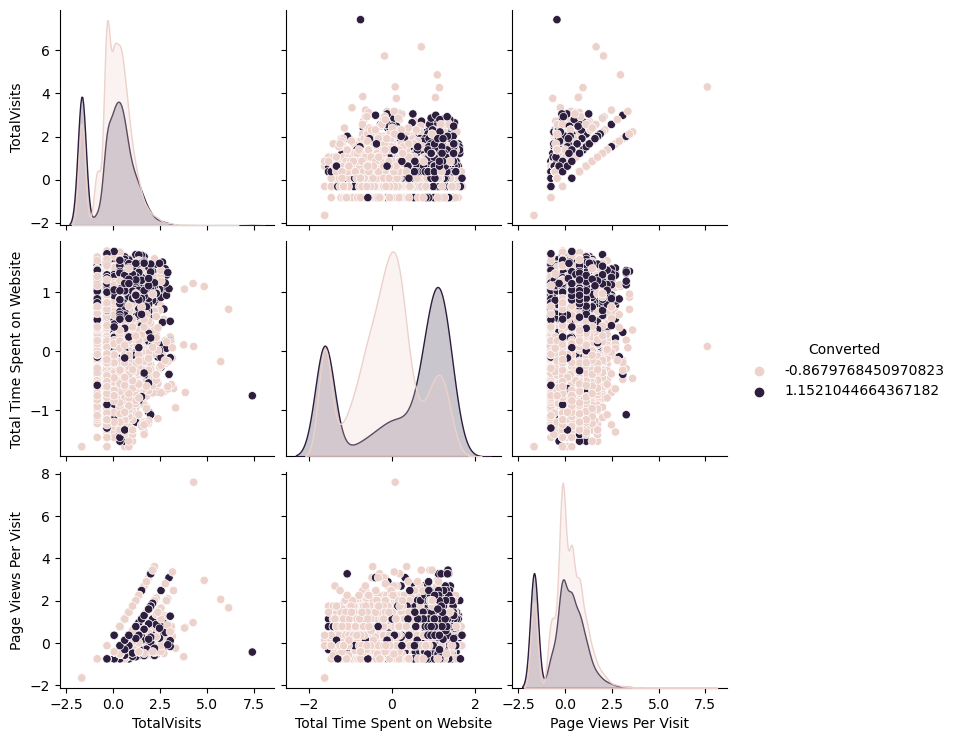

In [59]:
sns.pairplot(transformedEdu_Lead,diag_kind='kde',hue='Converted')
plt.show()

### 4.2 Dummy variable creation for categorical variables

    The next step is to deal with the categorical variables present in the dataset. So first take a look at which variables     are actually categorical variables.

In [60]:
# Check the columns which are of type 'object'

temp = LeadScoring_df.loc[:, LeadScoring_df.dtypes == 'object']
temp.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [61]:
# Create dummy variables using the 'get_dummies' command
Dummy = pd.get_dummies(LeadScoring_df[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
LeadScoring_df = pd.concat([LeadScoring_df, Dummy], axis=1)

In [62]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' which is useless so we
# drop that level by specifying it explicitly

Dummy_Sep = pd.get_dummies(LeadScoring_df['Specialization'], prefix = 'Specialization')
Dummy_Sep = Dummy_Sep.drop(['Specialization_Select'], 1)
LeadScoring_df = pd.concat([LeadScoring_df, Dummy_Sep], axis = 1)

In [63]:
# Drop the variables for which the dummy variables have been created

LeadScoring_df = LeadScoring_df.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [65]:
# Let's take a look at the dataset again

LeadScoring_df.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### 4.3 Test-Train Split

The next step is to split the dataset into training an testing sets.

In [66]:
# Import the required library

from sklearn.model_selection import train_test_split

In [67]:
# Put all the feature variables in X

X = LeadScoring_df.drop(['Converted'], 1)
X.head()


,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [68]:
# Put the target variable in y

y = LeadScoring_df['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [69]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 4.4 Scaling

Now there are a few numeric variables present in the dataset which have different scales. So let's go ahead and scale    these variables.

In [70]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [71]:
# Scale the three numeric features present in the dataset

scaler = MinMaxScaler()

X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,"Specialization_Banking, Investment And Insurance",Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
9023,0.042553,0.115317,0.109091,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32,0.028369,0.098151,0.036364,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1095,0.014184,0.237236,0.036364,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4082,0.007092,0.129842,0.018182,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1248,0.014184,0.658891,0.036364,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


### 4.5 Looking at the correlations

Let's now look at the correlations. Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

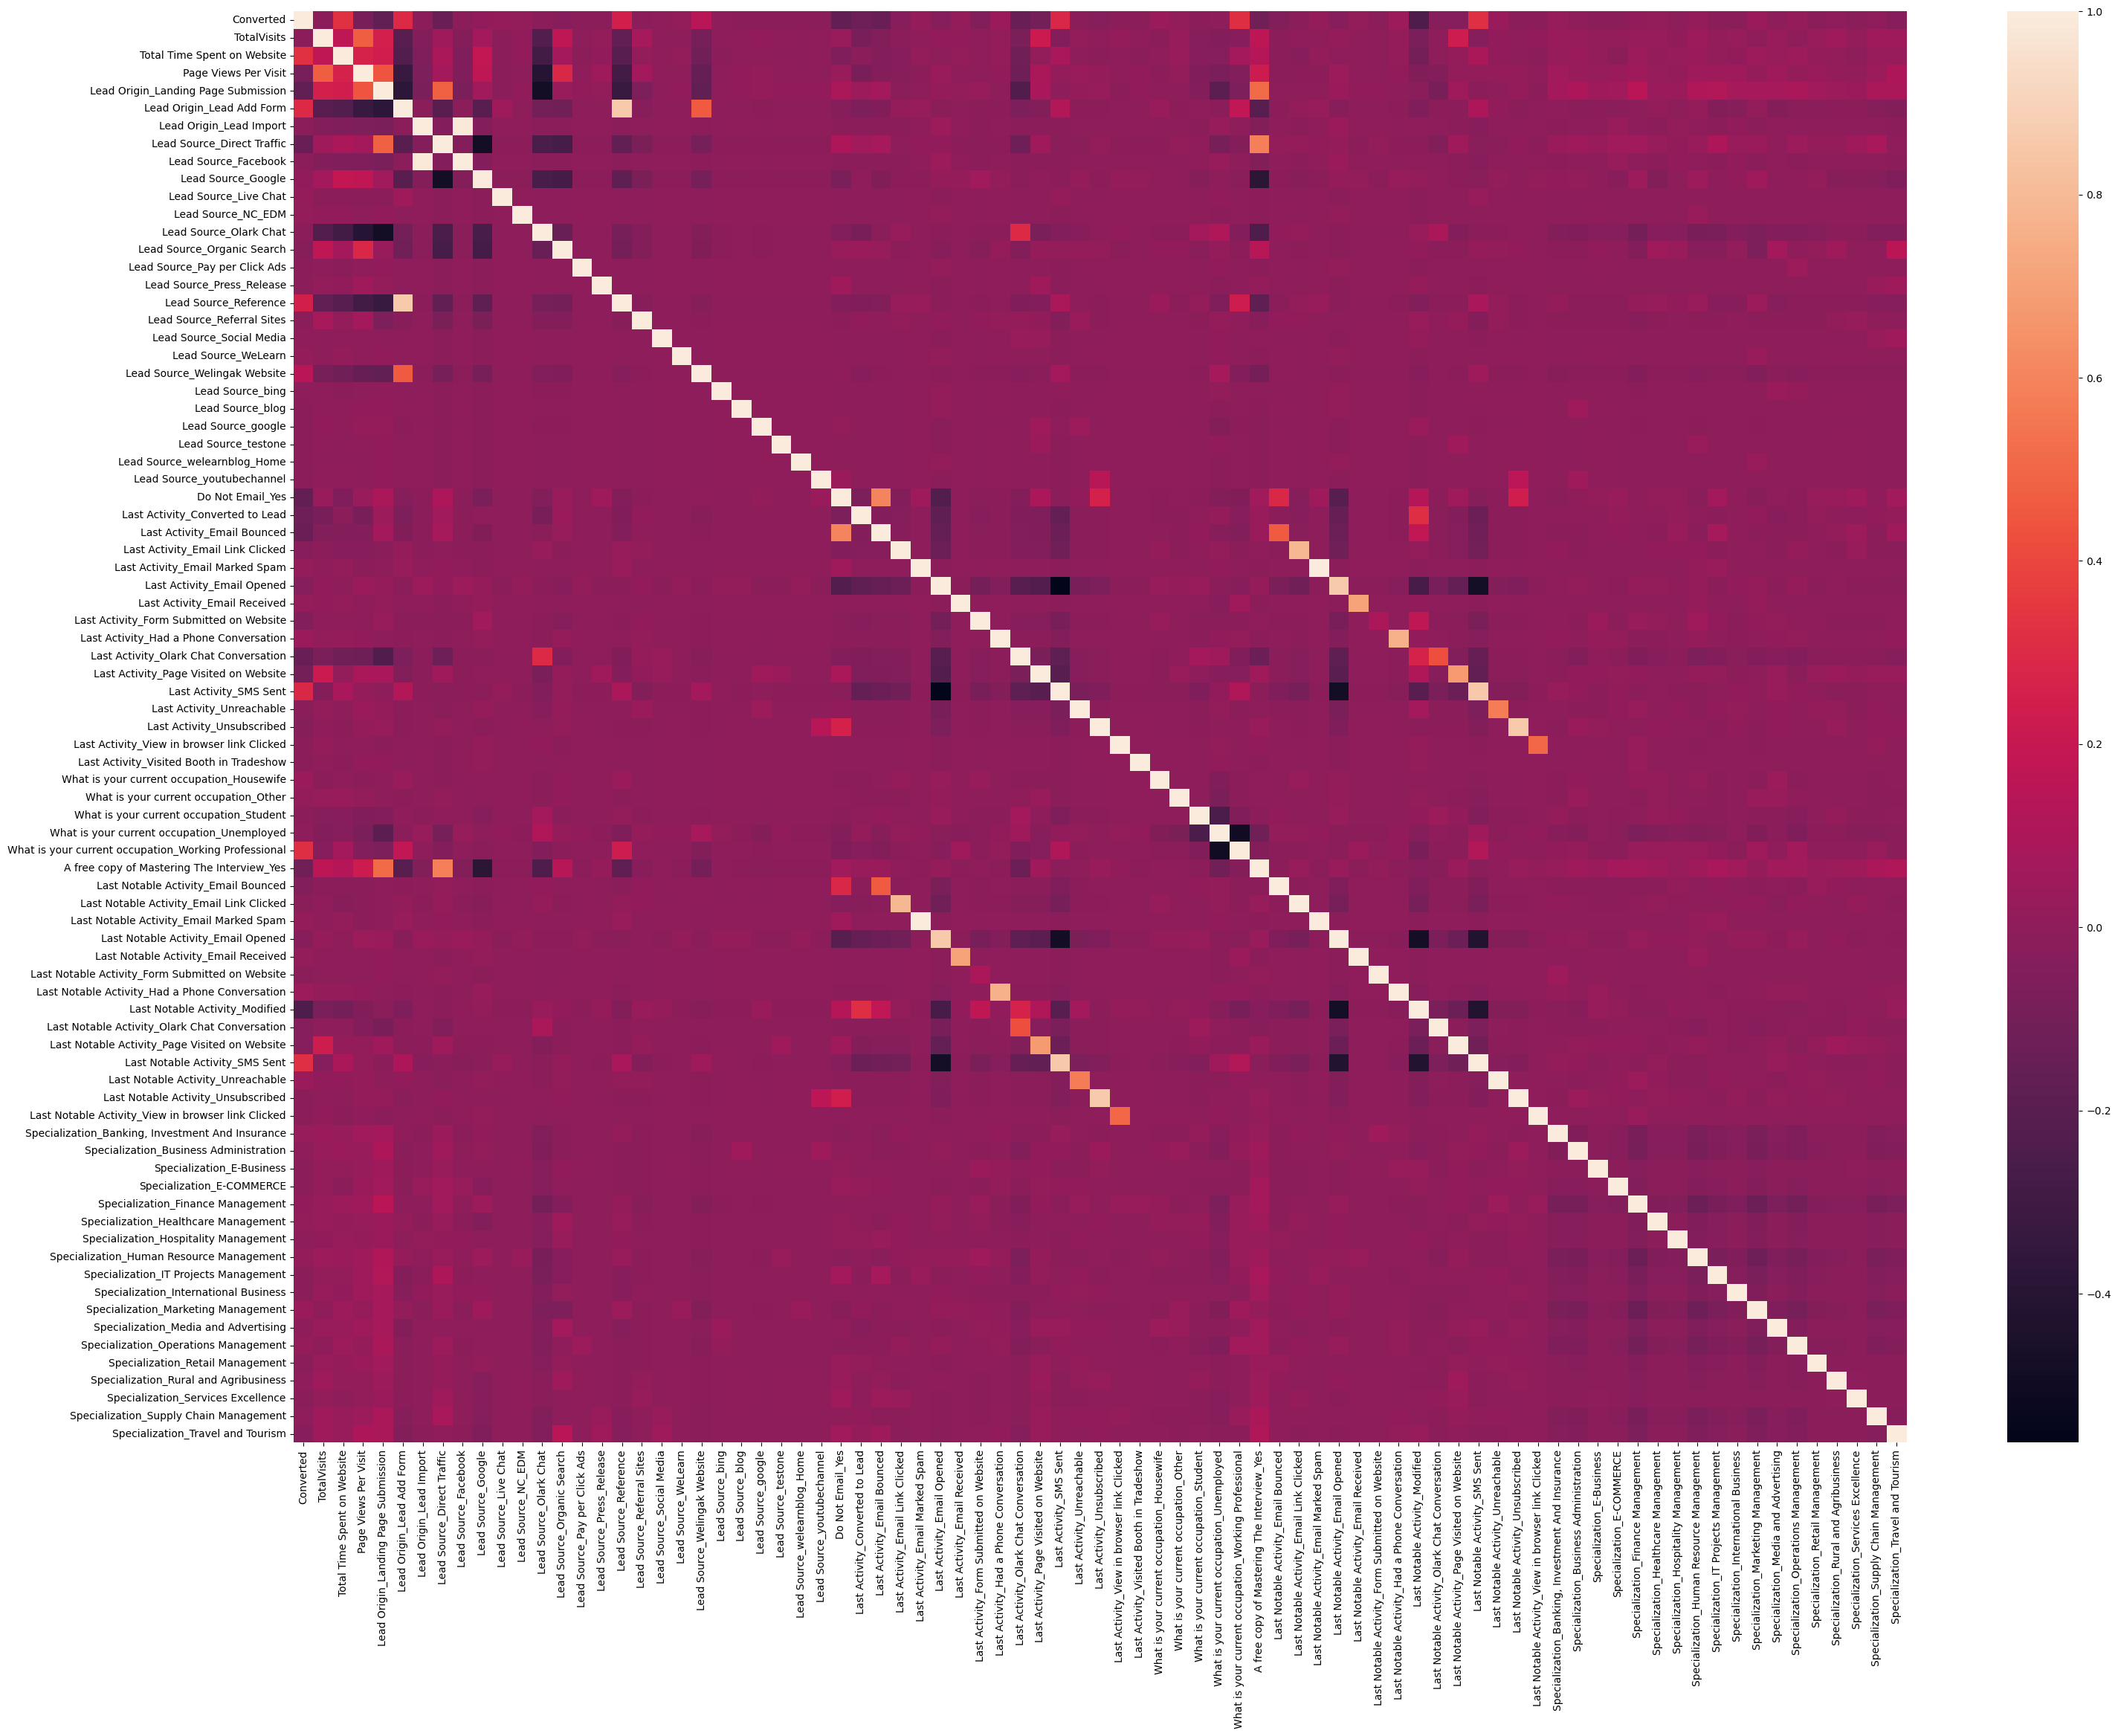

In [72]:
# Looking at the correlation table
plt.figure(figsize = (35,25))
sns.heatmap(LeadScoring_df.corr())
plt.show()

## 5.0 Model Building
Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we      cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [73]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [74]:
# Import RFE and select 15 variables

from sklearn.feature_selection import RFE
n_features = 15

In [75]:
# Instantiate the RFE object with the estimator and number of features
rfe = RFE(estimator=logreg, n_features_to_select=n_features)

# Fit RFE on your training data (X_train and y_train)
rfe = rfe.fit(X_train, y_train)

# Access the selected features
selected_features = rfe.support_

In [76]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 6),
 ('Lead Origin_Landing Page Submission', False, 13),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 56),
 ('Lead Source_Direct Traffic', False, 29),
 ('Lead Source_Facebook', False, 62),
 ('Lead Source_Google', False, 32),
 ('Lead Source_Live Chat', False, 49),
 ('Lead Source_NC_EDM', False, 65),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 31),
 ('Lead Source_Pay per Click Ads', False, 45),
 ('Lead Source_Press_Release', False, 58),
 ('Lead Source_Reference', False, 5),
 ('Lead Source_Referral Sites', False, 30),
 ('Lead Source_Social Media', False, 54),
 ('Lead Source_WeLearn', False, 39),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 59),
 ('Lead Source_blog', False, 46),
 ('Lead Source_google', False, 51),
 ('Lead Source_testone', False, 36),
 ('Lead Source_welearnblog_Home', False, 53),
 

In [77]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

In [78]:
# Select only the columns selected by RFE

X_train = X_train[col]

In [79]:
# Import statsmodels

import statsmodels.api as sm

In [80]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5334
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2387.2
Date:                Tue, 18 Apr 2023   Deviance:                       4774.4
Time:                        21:09:08   Pearson chi2:                 5.44e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3803
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5049      0.136    -25.709      0.000      -3.772      -3.238
TotalVisits                                              4.8014      1.218      3.943      0.000       2.415       7.188
Total Time Spent on Website                              4.4285      0.172     25.792      0.000       4.092       4.765
Lead Origin_Lead Add Form                                3.8981      0.239     16.303      0.000       3.429       4.367
Lead Source_Olark Chat                                   1.4188      0.116     12.240      0.000       1.192       1.646
Lead Source_Welingak Website                             1.7725      0.755      2.347      0.019       0.292       3.253
Do Not Email_Yes                                        -1.6210      0.177     -9.165      0.000      -1.968      -1.274
Last Activity_Had a Phone Conversation                   0.4385      0.947      0.463      0.643      -1.417       2.294
Last Activity_SMS Sent                                   1.2793      0.077     16.651      0.000       1.129       1.430
What is your current occupation_Housewife               24.1552   1.68e+04      0.001      0.999   -3.29e+04     3.3e+04
What is your current occupation_Other                    2.9274      0.848      3.454      0.001       1.266       4.589
What is your current occupation_Student                  1.3098      0.240      5.456      0.000       0.839       1.780
What is your current occupation_Unemployed               1.2413      0.114     10.889      0.000       1.018       1.465
What is your current occupation_Working Professional     3.9013      0.220     17.711      0.000       3.470       4.333
Last Notable Activity_Had a Phone Conversation           3.1603      1.463      2.160      0.031       0.293       6.027
Last Notable Activity_Unreachable                        2.3923      0.548      4.368      0.000       1.319       3.466
========================================================================================================================
"""

In [81]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.83
6,Last Activity_Had a Phone Conversation,2.58
13,Last Notable Activity_Had a Phone Conversation,2.57
1,Total Time Spent on Website,2.14
0,TotalVisits,1.80
2,Lead Origin_Lead Add Form,1.64
7,Last Activity_SMS Sent,1.53
12,What is your current occupation_Working Profes...,1.39
3,Lead Source_Olark Chat,1.36
4,Lead Source_Welingak Website,1.34


The VIFs are now all less than 5. So let's drop the ones with the high p-values beginning with Last Notable Activity_Had a Phone Conversation.

In [83]:
# Refit the model with the new set of features

Rf = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
Rf.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5334
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2387.2
Date:                Tue, 18 Apr 2023   Deviance:                       4774.4
Time:                        21:09:16   Pearson chi2:                 5.44e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3803
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.5049      0.136    -25.709      0.000      -3.772      -3.238
TotalVisits                                              4.8014      1.218      3.943      0.000       2.415       7.188
Total Time Spent on Website                              4.4285      0.172     25.792      0.000       4.092       4.765
Lead Origin_Lead Add Form                                3.8981      0.239     16.303      0.000       3.429       4.367
Lead Source_Olark Chat                                   1.4188      0.116     12.240      0.000       1.192       1.646
Lead Source_Welingak Website                             1.7725      0.755      2.347      0.019       0.292       3.253
Do Not Email_Yes                                        -1.6210      0.177     -9.165      0.000      -1.968      -1.274
Last Activity_Had a Phone Conversation                   0.4385      0.947      0.463      0.643      -1.417       2.294
Last Activity_SMS Sent                                   1.2793      0.077     16.651      0.000       1.129       1.430
What is your current occupation_Housewife               24.1552   1.68e+04      0.001      0.999   -3.29e+04     3.3e+04
What is your current occupation_Other                    2.9274      0.848      3.454      0.001       1.266       4.589
What is your current occupation_Student                  1.3098      0.240      5.456      0.000       0.839       1.780
What is your current occupation_Unemployed               1.2413      0.114     10.889      0.000       1.018       1.465
What is your current occupation_Working Professional     3.9013      0.220     17.711      0.000       3.470       4.333
Last Notable Activity_Had a Phone Conversation           3.1603      1.463      2.160      0.031       0.293       6.027
Last Notable Activity_Unreachable                        2.3923      0.548      4.368      0.000       1.319       3.466
========================================================================================================================
"""

Drop `What is your current occupation_Housewife`.

In [84]:
X_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [85]:
# Refit the model with the new set of features

Rf = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
Rf.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5335
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2395.4
Date:                Tue, 18 Apr 2023   Deviance:                       4790.8
Time:                        21:09:20   Pearson chi2:                 5.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3784
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4567      0.135    -25.690      0.000      -3.720      -3.193
TotalVisits                                              4.7500      1.216      3.907      0.000       2.367       7.133
Total Time Spent on Website                              4.4244      0.171     25.831      0.000       4.089       4.760
Lead Origin_Lead Add Form                                3.9330      0.239     16.437      0.000       3.464       4.402
Lead Source_Olark Chat                                   1.4155      0.116     12.225      0.000       1.189       1.642
Lead Source_Welingak Website                             1.7369      0.755      2.299      0.022       0.256       3.218
Do Not Email_Yes                                        -1.6256      0.177     -9.197      0.000      -1.972      -1.279
Last Activity_Had a Phone Conversation                   0.4363      0.947      0.461      0.645      -1.419       2.291
Last Activity_SMS Sent                                   1.2701      0.077     16.562      0.000       1.120       1.420
What is your current occupation_Other                    2.8843      0.847      3.404      0.001       1.224       4.545
What is your current occupation_Student                  1.2641      0.239      5.284      0.000       0.795       1.733
What is your current occupation_Unemployed               1.1986      0.112     10.662      0.000       0.978       1.419
What is your current occupation_Working Professional     3.8576      0.219     17.583      0.000       3.428       4.288
Last Notable Activity_Had a Phone Conversation           3.1481      1.461      2.155      0.031       0.285       6.011
Last Notable Activity_Unreachable                        2.3747      0.547      4.343      0.000       1.303       3.446
========================================================================================================================
"""

In [86]:
# Refit the model with the new set of features

RF = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
RF1 = RF.fit()
RF1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5350
Model:                            GLM   Df Residuals:                     5335
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2395.4
Date:                Tue, 18 Apr 2023   Deviance:                       4790.8
Time:                        21:09:24   Pearson chi2:                 5.46e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3784
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -3.4567      0.135    -25.690      0.000      -3.720      -3.193
TotalVisits                                              4.7500      1.216      3.907      0.000       2.367       7.133
Total Time Spent on Website                              4.4244      0.171     25.831      0.000       4.089       4.760
Lead Origin_Lead Add Form                                3.9330      0.239     16.437      0.000       3.464       4.402
Lead Source_Olark Chat                                   1.4155      0.116     12.225      0.000       1.189       1.642
Lead Source_Welingak Website                             1.7369      0.755      2.299      0.022       0.256       3.218
Do Not Email_Yes                                        -1.6256      0.177     -9.197      0.000      -1.972      -1.279
Last Activity_Had a Phone Conversation                   0.4363      0.947      0.461      0.645      -1.419       2.291
Last Activity_SMS Sent                                   1.2701      0.077     16.562      0.000       1.120       1.420
What is your current occupation_Other                    2.8843      0.847      3.404      0.001       1.224       4.545
What is your current occupation_Student                  1.2641      0.239      5.284      0.000       0.795       1.733
What is your current occupation_Unemployed               1.1986      0.112     10.662      0.000       0.978       1.419
What is your current occupation_Working Professional     3.8576      0.219     17.583      0.000       3.428       4.288
Last Notable Activity_Had a Phone Conversation           3.1481      1.461      2.155      0.031       0.285       6.011
Last Notable Activity_Unreachable                        2.3747      0.547      4.343      0.000       1.303       3.446
========================================================================================================================
"""

In [87]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,What is your current occupation_Unemployed,2.83
6,Last Activity_Had a Phone Conversation,2.58
12,Last Notable Activity_Had a Phone Conversation,2.57
1,Total Time Spent on Website,2.13
0,TotalVisits,1.80
2,Lead Origin_Lead Add Form,1.64
7,Last Activity_SMS Sent,1.53
11,What is your current occupation_Working Profes...,1.39
3,Lead Source_Olark Chat,1.36
4,Lead Source_Welingak Website,1.34


## 6.0 Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. So let's go ahead and make predictions using this final set of features.

In [88]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = RF1.predict(sm.add_constant(X_train))
y_train_pred[:10]

9023    0.175687
32      0.155885
1095    0.242103
4082    0.161106
1248    0.880213
3837    0.990823
1655    0.731348
659     0.300968
7640    0.558145
4577    0.978620
dtype: float64

In [89]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.17568685, 0.15588508, 0.24210266, 0.16110556, 0.88021293,
       0.99082271, 0.73134774, 0.30096849, 0.55814476, 0.97862046])

### 6.1 Creating a dataframe with the actual conversion flag and the predicted probabilities

In [90]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.175687
1,0,0.155885
2,0,0.242103
3,0,0.161106
4,0,0.880213


In [91]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.175687,0
1,0,0.155885,0
2,0,0.242103,0
3,0,0.161106,0
4,0,0.880213,1


In [92]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [93]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[2575  431]
 [ 674 1670]]


In [94]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.7934579439252336


That's around 79.34% accuracy with is a very good value___

In [95]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [96]:
# Calculate Sensitivity

TP/(TP+FN)

0.712457337883959

In [97]:
# Calculate Specificity

TN/(TN+FP)

0.8566200931470392

### 6.2 Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [98]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [99]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [100]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

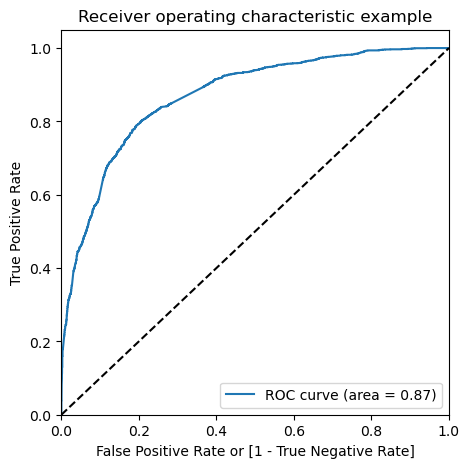

In [101]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.86 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [102]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.175687,0,1,1,0,0,0,0,0,0,0,0
1,0,0.155885,0,1,1,0,0,0,0,0,0,0,0
2,0,0.242103,0,1,1,1,0,0,0,0,0,0,0
3,0,0.161106,0,1,1,0,0,0,0,0,0,0,0
4,0,0.880213,1,1,1,1,1,1,1,1,1,1,0


In [103]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.438131  1.000000  0.000000
0.1   0.1  0.556636  0.991041  0.217898
0.2   0.2  0.714206  0.932167  0.544245
0.3   0.3  0.748224  0.893345  0.635063
0.4   0.4  0.798505  0.790529  0.804724
0.5   0.5  0.793458  0.712457  0.856620
0.6   0.6  0.784112  0.645478  0.892216
0.7   0.7  0.751028  0.521331  0.930140
0.8   0.8  0.726729  0.426621  0.960745
0.9   0.9  0.672897  0.270904  0.986361


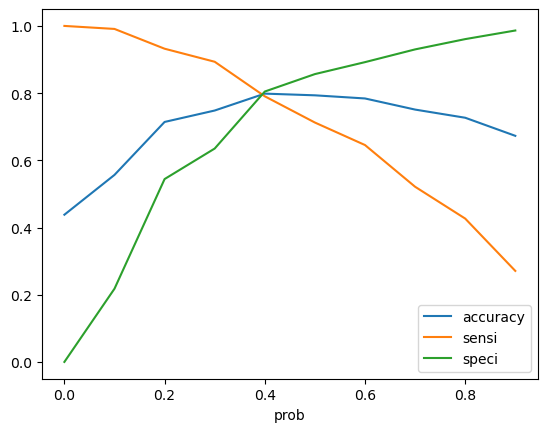

In [104]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [105]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.175687,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.155885,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.242103,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.161106,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.880213,1,1,1,1,1,1,1,1,1,1,0,1


In [106]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7973831775700935

In [107]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2456,  550],
       [ 534, 1810]], dtype=int64)

In [108]:
# Let's evaluate the other metrics as well

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [109]:
# Calculate Sensitivity

TP/(TP+FN)

0.7721843003412969

In [110]:
# Calculate Specificity

TN/(TN+FP)

0.8170326014637392

This cutoff point seems good to go!

### 6.3 Making Predictions on the Test Set

        Let's now make predicitons on the test set.

In [111]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [112]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]
X_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
3879,0.014184,0.170335,0,0,0,0,0,0,0,0,0,0,0,0,0
4168,0.021277,0.197623,0,0,0,0,0,1,0,0,0,0,1,0,0
7510,0.014184,0.102553,0,0,0,0,0,1,0,0,0,1,0,0,0
2935,0.028369,0.724472,0,0,0,0,0,1,0,0,0,1,0,0,0
7245,0.078014,0.842430,0,0,0,0,0,1,0,0,0,1,0,0,0


In [113]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])

In [114]:
# Check X_test_sm

X_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable
3879,1.0,0.014184,0.170335,0,0,0,0,0,0,0,0,0,0,0,0,0
4168,1.0,0.021277,0.197623,0,0,0,0,0,1,0,0,0,0,1,0,0
7510,1.0,0.014184,0.102553,0,0,0,0,0,1,0,0,0,1,0,0,0
2935,1.0,0.028369,0.724472,0,0,0,0,0,1,0,0,0,1,0,0,0
7245,1.0,0.078014,0.842430,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,1.0,0.021277,0.065581,0,0,0,0,0,1,0,0,0,1,0,0,0
3605,1.0,0.014184,0.078785,0,0,0,0,0,0,0,0,0,0,0,0,0
6718,1.0,0.035461,0.038292,0,0,0,1,0,0,0,0,0,1,0,0,0
4451,1.0,0.035461,0.110035,0,0,0,0,0,1,0,0,0,0,0,0,0


In [115]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [116]:
y_test_pred[:10]

3879    0.064013
4168    0.934191
7510    0.386482
2935    0.913736
7245    0.957746
787     0.187793
2208    0.300505
8182    0.104179
4055    0.300505
138     0.396034
dtype: float64

In [117]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [118]:
# Let's see the head

y_pred_1.head()

,0
3879,0.064013
4168,0.934191
7510,0.386482
2935,0.913736
7245,0.957746


In [119]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [120]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [121]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [122]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.064013
1,1,0.934191
2,0,0.386482
3,1,0.913736
4,1,0.957746


In [123]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [124]:
# Let's see the head of y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.064013
1,1,0.934191
2,0,0.386482
3,1,0.913736
4,1,0.957746


In [125]:
# Make predictions on the test set using 0.45 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [126]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.064013,0
1,1,0.934191,1
2,0,0.386482,0
3,1,0.913736,1
4,1,0.957746,1


In [127]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7906672481465329

In [128]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1088,  265],
       [ 215,  725]], dtype=int64)

In [129]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [130]:
# Calculate sensitivity
TP / float(TP+FN)

0.7712765957446809

In [131]:
# Calculate specificity
TN / float(TN+FP)

0.804138950480414

### 6.4 Precision-Recall View

Let's now also build the training model using the precision-recall view

In [132]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[2575,  431],
       [ 674, 1670]], dtype=int64)

##### Precision
TP / TP + FP

In [133]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.794859590671109

##### Recall
TP / TP + FN

In [134]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.712457337883959

### Precision and recall tradeoff

In [135]:
from sklearn.metrics import precision_recall_curve

In [136]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 5345    0
 5346    1
 5347    1
 5348    0
 5349    1
 Name: Converted, Length: 5350, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 5345    0
 5346    1
 5347    1
 5348    0
 5349    1
 Name: Predicted, Length: 5350, dtype: int64)

In [137]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

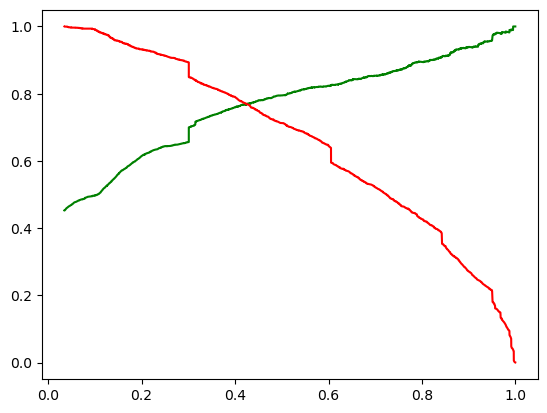

In [138]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [139]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.175687,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.155885,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.242103,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.161106,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.880213,1,1,1,1,1,1,1,1,1,1,0,1


In [140]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7968224299065421

In [141]:
# Let's create the confusion matrix once again

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[2491,  515],
       [ 572, 1772]], dtype=int64)

In [142]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [143]:
# Calculate Precision

TP/(TP+FP)

0.774814167031045

In [144]:
# Calculate Recall

TP/(TP+FN)

0.7559726962457338

### 6.5 Making Predictions on the Test Set

Let's now make predicitons on the test set.

In [145]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

y_test_pred = res.predict(sm.add_constant(X_test))

In [146]:
y_test_pred[:10]

3879    0.064013
4168    0.934191
7510    0.386482
2935    0.913736
7245    0.957746
787     0.187793
2208    0.300505
8182    0.104179
4055    0.300505
138     0.396034
dtype: float64

In [147]:
# Converting y_pred to a dataframe

y_pred_1 = pd.DataFrame(y_test_pred)

In [148]:
# Let's see the head

y_pred_1.head()

,0
3879,0.064013
4168,0.934191
7510,0.386482
2935,0.913736
7245,0.957746


In [149]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [150]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [151]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [152]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.064013
1,1,0.934191
2,0,0.386482
3,1,0.913736
4,1,0.957746


In [153]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [154]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [155]:
# Check y_pred_final

y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.064013,0
1,1,0.934191,1
2,0,0.386482,0
3,1,0.913736,1
4,1,0.957746,1


In [156]:
# Let's check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.796772786742259

In [157]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1112,  241],
       [ 225,  715]], dtype=int64)

In [158]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [159]:
# Calculate Precision

TP/(TP+FP)

0.747907949790795

In [160]:
# Calculate Recall

TP/(TP+FN)

0.7606382978723404

With the current cut off as 0.44 we have Precision around 75% and Recall around 76%.

## 7.0 Summary

We have lot many leads generated in the initial stage but only a few of them come out as paying customers

Need to nurture the potential leads well by way of educating the leads about the product and constantly engaging in order to get a higher lead conversion

Following approach is recommended:

1. Sort out the best prospects from the generated leads which contribute most towards the probability of a lead getting converted - below are 3 main dependent variables
 - 'TotalVisits'
 - 'Total Time Spent on Website'
 - 'Page Views Per Visit'

2. Leads may be informed about new courses, services, job offers and future higher studies

3. Monitor each lead carefully so that tailored information can be shared with them 

4. Job offerings, information on courses that suits best according to the interest of the leads may be shared

5. A proper plan to chart the needs of each lead will go a long way to capture the leads as prospects

6. Focusing on converted leads by way of holding question-answer sessions with leads to extract the right information that made them opting for course

7. Making further inquiries and appointments with the leads to determine their intention and mentality to join online courses 

### Prepared by 
#### 1. Indrajeet Chaudhary
#### 2. Srinivas Dasari
#### 3. Mohammad Ali

#### DCS 49 Oct 22 BACTH 